# Conceptual:

## Question1:

![Q1](Chapter10/Q1.jpeg)

## Question2:

![Q2](Chapter10/Q2.jpeg)

## Question3:

![Q3](Chapter10/Q3.jpeg)

## Question4:

![Q4](Chapter10/Q4.jpeg)

## Question5:

MAE represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model.

One pitfall of R-squared is that it can only increase as predictors are added to the regression model. so as we add more predictors the r-squared will increase even if those features don't improve the fit of the data.

S both differ in their ordering because each metric measures different thing:
for Rsquared, it tells us the performance of the model, not the loss in an absolute sense that how many wells did your model perform on average like in MAE


# Applied:

## Question6:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


A)

In [2]:
def sin_function(arr):
    output = np.sin(arr)+(arr/10)
    return output

In [3]:
x = np.linspace(-6,6,num=100)
y= sin_function(x)

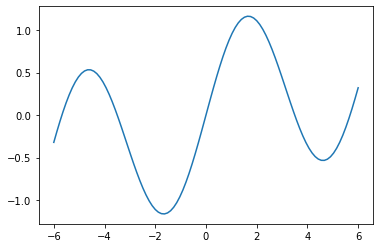

In [4]:
plt.plot(x,y)

B)

In [5]:
def derivative(arr):
    output= np.cos(arr)+0.1
    return output

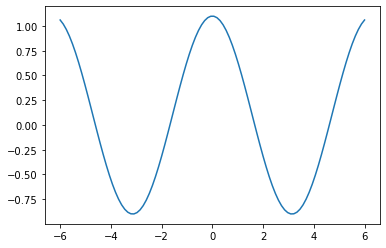

In [6]:
y_dash= derivative(x)
plt.plot(x,y_dash)

In [7]:
def gradient_descent(x_start,rate,max_iters = 10000,precision = 0.000001):
    abs_error=1
    cur_x = x_start
    iters=0
    while abs_error > precision and iters < max_iters:
        prev_x = cur_x
        cur_x = cur_x - rate * derivative(cur_x) #Grad descent
        abs_error = abs(cur_x - prev_x) #Change in x
        iters = iters+1 #iteration count
        print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
    print("The local minimum occurs at", cur_x)

C)

In [8]:
gradient_descent(x_start=2.3,rate=0.1)

Iteration 1 
X value is 2.356627602127982
Iteration 2 
X value is 2.417368899252185
Iteration 3 
X value is 2.482270294494037
Iteration 4 
X value is 2.5513110468082814
Iteration 5 
X value is 2.624389443920024
Iteration 6 
X value is 2.7013099892576737
Iteration 7 
X value is 2.7817731121759457
Iteration 8 
X value is 2.865369150110824
Iteration 9 
X value is 2.951578373984101
Iteration 10 
X value is 3.039778527802761
Iteration 11 
X value is 3.129260669572447
Iteration 12 
X value is 3.219253065777322
Iteration 13 
X value is 3.3089516603268203
Iteration 14 
X value is 3.3975544741953763
Iteration 15 
X value is 3.4842964975255977
Iteration 16 
X value is 3.5684814498701134
Iteration 17 
X value is 3.649507281707111
Iteration 18 
X value is 3.726883345739896
Iteration 19 
X value is 3.8002384988037385
Iteration 20 
X value is 3.869320675008235
Iteration 21 
X value is 3.933989434139909
Iteration 22 
X value is 3.994203507613556
Iteration 23 
X value is 4.0500054491374575
Iteration 2

D)

In [9]:
gradient_descent(x_start=1.4,rate=0.1)

Iteration 1 
X value is 1.3730032857099759
Iteration 2 
X value is 1.3433526975046133
Iteration 3 
X value is 1.3108039245972876
Iteration 4 
X value is 1.2750966036528226
Iteration 5 
X value is 1.2359556761032773
Iteration 6 
X value is 1.1930938086461986
Iteration 7 
X value is 1.14621521842553
Iteration 8 
X value is 1.0950213065176138
Iteration 9 
X value is 1.0392185535526115
Iteration 10 
X value is 0.978529151020619
Iteration 11 
X value is 0.9127048030200917
Iteration 12 
X value is 0.8415439975275897
Iteration 13 
X value is 0.7649127671705573
Iteration 14 
X value is 0.6827684905051868
Iteration 15 
X value is 0.595185597146049
Iteration 16 
X value is 0.5023811515708799
Iteration 17 
X value is 0.40473730255079815
Iteration 18 
X value is 0.3028167152333715
Iteration 19 
X value is 0.19736668481375663
Iteration 20 
X value is 0.08930805099949485
Iteration 21 
X value is -0.020293417595656962
Iteration 22 
X value is -0.13027282716242006
Iteration 23 
X value is -0.239425476

## Question7:

In [10]:
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [11]:
np.random.seed(0)
default_df = pd.read_csv('csv/Default.csv')
default_df = default_df.dropna()
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [12]:
default_df['student'] = default_df['student'].map({'Yes':1,'No':0})
default_df['default'] = default_df['default'].map({'Yes':1,'No':0})


In [13]:
X = default_df.loc[:,['student','balance','income']].values
y = default_df.loc[:,'default'].values

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1,1)).toarray()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [17]:
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 231us/sample - loss: 0.5425 - accuracy: 0.7029
Epoch 2/100
8000/8000 [==============================] - 0s 53us/sample - loss: 0.2452 - accuracy: 0.9679
Epoch 3/100
8000/8000 [==============================] - 0s 53us/sample - loss: 0.1509 - accuracy: 0.9676
Epoch 4/100
8000/8000 [==============================] - 0s 52us/sample - loss: 0.1195 - accuracy: 0.9676
Epoch 5/100
8000/8000 [==============================] - 0s 50us/sample - loss: 0.1073 - accuracy: 0.9676
Epoch 6/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.1006 - accuracy: 0.9676
Epoch 7/100
8000/8000 [==============================] - 0s 57us/sample - loss: 0.0957 - accuracy: 0.9676
Epoch 8/100
8000/8000 [==============================] - 0s 62us/sample - loss: 0.0918 - accuracy: 0.9680
Epoch 9/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.0886 - accuracy: 0.9682
Epoch 10/100
8000/8000 

In [19]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [20]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)


Accuracy is: 97.05


In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train[:,0])
y_pred = clf.predict(X_test)

In [22]:
a = accuracy_score(y_pred,y_test[:,0])
print('Accuracy is:', a*100)


Accuracy is: 97.15


###### As we can see the deep learning perform the same on the test data as the Logistic regression and both models have the same accuarcy.

## Question8:

In [23]:
import glob
filelist = glob.glob('images/*.png')
from PIL import Image

In [24]:
#from tensorflow.keras.applications.vgg16 import VGG16

#model = VGG16()

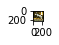

Predicted: [('dalmatian', 0.9896151), ('Great_Dane', 0.010087437), ('German_short-haired_pointer', 0.00019233316), ('English_setter', 6.2337735e-05), ('English_foxhound', 8.892279e-06)]


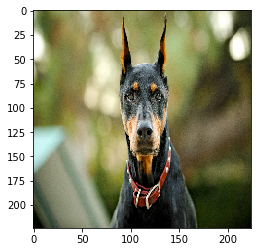

Predicted: [('Doberman', 0.99995875), ('black-and-tan_coonhound', 1.3481879e-05), ('Gordon_setter', 1.14664135e-05), ('Great_Dane', 2.6679106e-06), ('Rottweiler', 2.4729782e-06)]


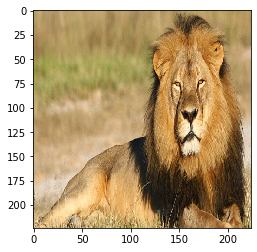

Predicted: [('lion', 0.9990652), ('hartebeest', 0.00020405039), ('impala', 0.00014586489), ('cheetah', 0.00010756983), ('gazelle', 6.612328e-05)]


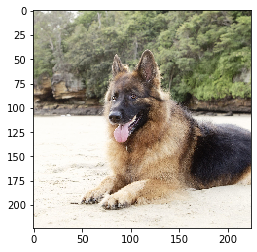

Predicted: [('German_shepherd', 0.9952998), ('malinois', 0.0042533884), ('Norwegian_elkhound', 0.00016454057), ('groenendael', 0.00016376957), ('keeshond', 3.4836143e-05)]


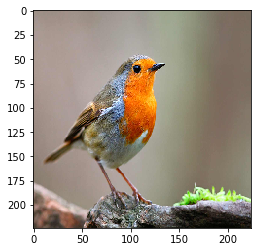

Predicted: [('brambling', 0.848924), ('robin', 0.049790926), ('goldfinch', 0.01871024), ('junco', 0.0126046995), ('hummingbird', 0.009516904)]


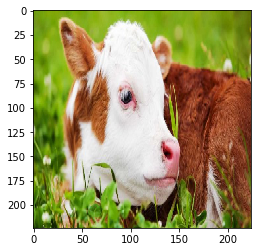

Predicted: [('Ibizan_hound', 0.95532864), ('sorrel', 0.014999889), ('hare', 0.0037819976), ('Brittany_spaniel', 0.0021484357), ('wood_rabbit', 0.0021433881)]


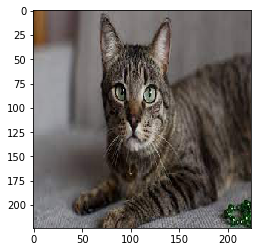

Predicted: [('tabby', 0.5014416), ('tiger_cat', 0.20092879), ('Egyptian_cat', 0.1870551), ('lynx', 0.07940255), ('tiger', 0.0077335928)]


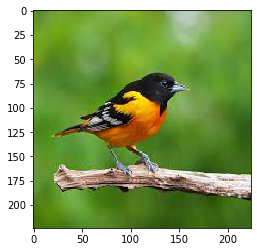

Predicted: [('jacamar', 0.33225548), ('brambling', 0.26995873), ('goldfinch', 0.056900788), ('indigo_bunting', 0.05083387), ('robin', 0.03533429)]


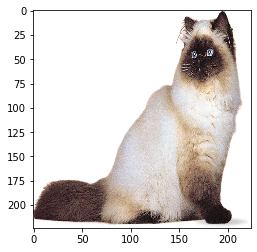

Predicted: [('Siamese_cat', 0.99731183), ('cougar', 0.0004279008), ('black-footed_ferret', 0.00030930195), ('otter', 0.00028523838), ('ice_bear', 0.00023380402)]


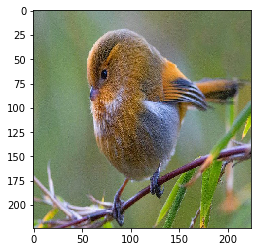

Predicted: [('brambling', 0.24582967), ('goldfinch', 0.191578), ('bee', 0.07721517), ('indigo_bunting', 0.06176784), ('house_finch', 0.047383033)]


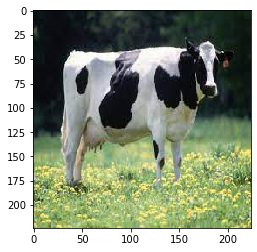

Predicted: [('ox', 0.69957966), ('oxcart', 0.22398475), ('Great_Dane', 0.007871664), ('ostrich', 0.0068836454), ('worm_fence', 0.006426827)]


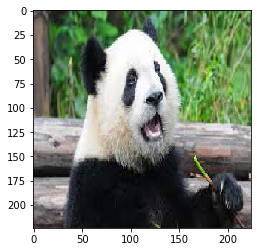

Predicted: [('giant_panda', 0.9992009), ('badger', 7.877733e-05), ('lesser_panda', 5.8958078e-05), ('sloth_bear', 5.6756664e-05), ('titi', 5.1394527e-05)]


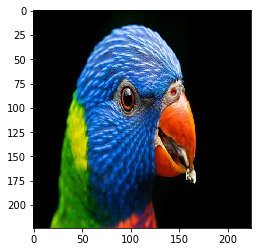

Predicted: [('lorikeet', 0.9901563), ('macaw', 0.001325773), ('toucan', 0.0008049267), ('coucal', 0.00036771595), ('drake', 0.00029587984)]


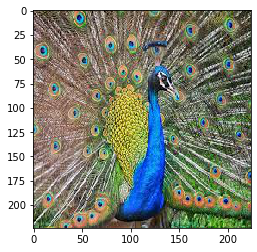

Predicted: [('peacock', 1.0), ('drake', 2.5787292e-10), ('feather_boa', 2.6595393e-11), ('indigo_bunting', 1.906101e-11), ('quill', 1.8538735e-11)]


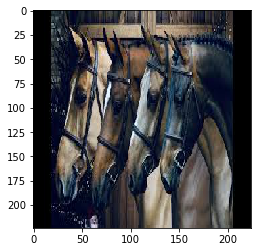

Predicted: [('wardrobe', 0.60200936), ('church', 0.02966315), ('ear', 0.02651649), ('worm_fence', 0.021747997), ('gar', 0.020024402)]


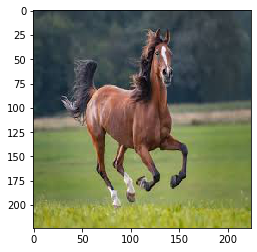

Predicted: [('sorrel', 0.9748786), ('Saluki', 0.005502205), ('hartebeest', 0.0052528996), ('llama', 0.0038883013), ('impala', 0.0013499119)]


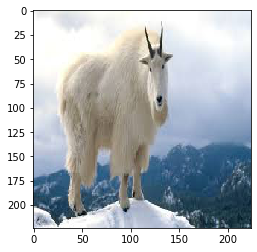

Predicted: [('ibex', 0.5617251), ('ram', 0.2839529), ('white_wolf', 0.060760505), ('llama', 0.041189615), ('Great_Pyrenees', 0.012541019)]


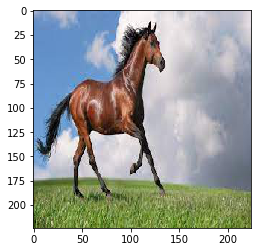

Predicted: [('hartebeest', 0.5056371), ('sorrel', 0.4449763), ('ibex', 0.0052073435), ('Mexican_hairless', 0.005200425), ('Irish_setter', 0.0048984424)]


In [31]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
f = plt.figure()
n=len(filelist)
i=0
for file in filelist:
    img = image.load_img(file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    f.add_subplot(n, 1, i + 1)
    plt.imshow(img)
    preds = model.predict(x)
    i+=1
    plt.show()
    preds =[(preds[1],preds[2]) for preds in decode_predictions(preds, top=5)[0]]
    print('Predicted:', preds)

## Question9:

###### I couldn't get the csv of the NYSE data so i will work with this csv file represemting stocks.

In [32]:
np.random.seed(0)
stocks_df = pd.read_csv('csv/Stocks.csv')

In [33]:
stocks_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [34]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df=stocks_df.set_index('Date')

In [35]:
HSI_df = stocks_df[stocks_df['Index']=='HSI']

In [36]:
HSI_df

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.000000e+00,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.000000e+00,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.000000e+00,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.000000e+00,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.000000e+00,338.923013
...,...,...,...,...,...,...,...,...
2021-05-25,HSI,28461.500000,28929.240230,28461.500000,28910.859380,28910.859380,2.352078e+09,3758.411719
2021-05-26,HSI,29056.279300,29261.859380,29027.949220,29166.009770,29166.009770,2.518538e+09,3791.581270
2021-05-27,HSI,28998.390630,29157.949220,28950.720700,29113.199220,29113.199220,3.804955e+09,3784.715899


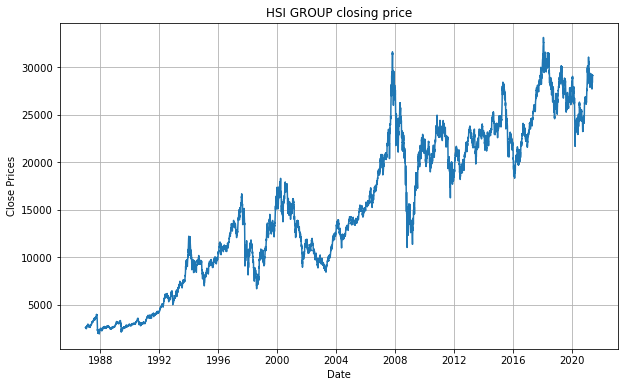

In [37]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(HSI_df['Close'])
plt.title('HSI GROUP closing price')
plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

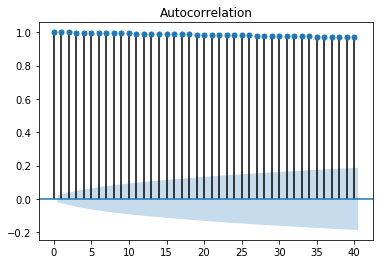

In [39]:
plot_acf(HSI_df['Close'], lags=40)
plt.show()

In [40]:
HSI_df.shape

(8492, 8)

In [41]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
train = HSI_df.iloc[:6792,4]
test = HSI_df.iloc[6792:,4]
# train autoregression
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

/anaconda3/envs/hello-tf/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Coefficients: intercept    9.679804
Close.L1     0.999755
Close.L2    -0.022925
Close.L3     0.037261
Close.L4    -0.029107
Close.L5     0.014497
dtype: float64


In [42]:
def create_lagdataframe(df,column, lags=1):
    df_col = pd.DataFrame(df[column].copy())
    for i in range(lags):
        df_col[f'lag_{i+1}'] = df[column].shift(i+1)
        
    return df_col

In [43]:
lag5_df = create_lagdataframe(HSI_df,'Close',lags=5)
lag5_df = lag5_df.dropna()

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


In [45]:
y = lag5_df['Close']
X = lag5_df.drop('Close',axis=1)
X = sm.add_constant(X)
y_train = y.iloc[:6792]
y_test = y.iloc[6792:]
X_train = X.iloc[:6792]
X_test = X.iloc[6792:]

In [46]:
mod=sm.OLS(y_train,X_train)
results=mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.202e+06
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:17:04   Log-Likelihood:                -46504.
No. Observations:                6792   AIC:                         9.302e+04
Df Residuals:                    6786   BIC:                         9.306e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7341      5.829      1.670      0.0

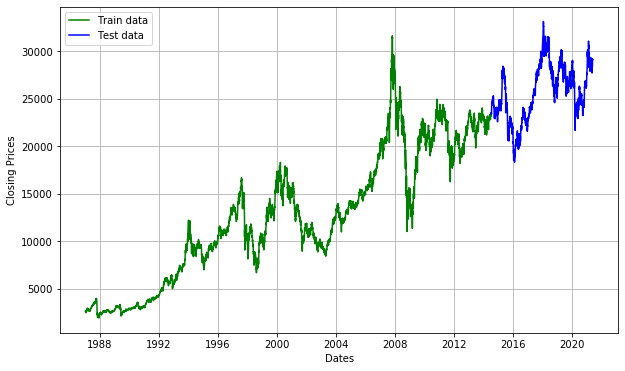

In [47]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(y_train, 'green', label='Train data')
plt.plot(y_test, 'blue', label='Test data')
plt.legend()

In [48]:
y_pred = results.predict(X_test)
error = mean_squared_error(y_test,y_pred)
print("The RMSE is: ",np.sqrt(error))

The RMSE is:  297.1992547165682


In [49]:
var_close = y_test.var()
R_squared = 1-(error/var_close)

In [50]:
print("The R_squared is: ",R_squared)

The R_squared is:  0.9898504211543362


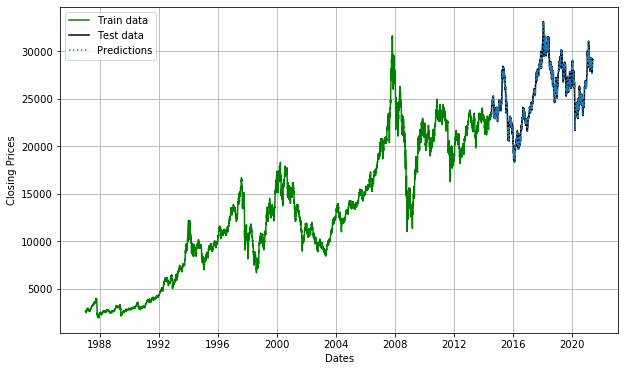

In [51]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(y_train, 'green', label='Train data')
plt.plot(y_test, 'black', label='Test data')
plt.plot(y_pred,':',label='Predictions')
plt.legend()

###### As we can see the predictions from our model are very close to the real values, which means that the model with 5 lags perform well on predicting the future value of the HSI index. 

###### Now we have to add the month column to the dataframe and refit and see how this model will perform?

In [52]:
lag5_df['month']=lag5_df.index.month

In [53]:
lag5_df

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,month
Date,,,,,,,
1987-01-08,2603.300049,2607.100098,2583.899902,2552.399902,2540.100098,2568.300049,1
1987-01-09,2561.699951,2603.300049,2607.100098,2583.899902,2552.399902,2540.100098,1
1987-01-12,2614.899902,2561.699951,2603.300049,2607.100098,2583.899902,2552.399902,1
1987-01-13,2590.800049,2614.899902,2561.699951,2603.300049,2607.100098,2583.899902,1
1987-01-14,2578.199951,2590.800049,2614.899902,2561.699951,2603.300049,2607.100098,1
...,...,...,...,...,...,...,...
2021-05-25,28910.859380,28412.259770,28458.439450,28450.289060,28593.810550,28194.089840,5
2021-05-26,29166.009770,28910.859380,28412.259770,28458.439450,28450.289060,28593.810550,5
2021-05-27,29113.199220,29166.009770,28910.859380,28412.259770,28458.439450,28450.289060,5


In [54]:
y = lag5_df['Close']
X = lag5_df.drop('Close',axis=1)
X = sm.add_constant(X)
y_train = y.iloc[:6792]
y_test = y.iloc[6792:]
X_train = X.iloc[:6792]
X_test = X.iloc[6792:]

In [55]:
mod_month=sm.OLS(y_train,X_train)
results_month=mod_month.fit()
print(results_month.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.002e+06
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:17:06   Log-Likelihood:                -46504.
No. Observations:                6792   AIC:                         9.302e+04
Df Residuals:                    6785   BIC:                         9.307e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5006      7.824      0.575      0.5

In [56]:
y_pred = results_month.predict(X_test)
error = mean_squared_error(y_test,y_pred)
print("The RMSE is: ",np.sqrt(error))

The RMSE is:  297.23574990158176


In [57]:
R_squared = 1-(error/var_close)

In [58]:
R_squared

0.9898479283250671

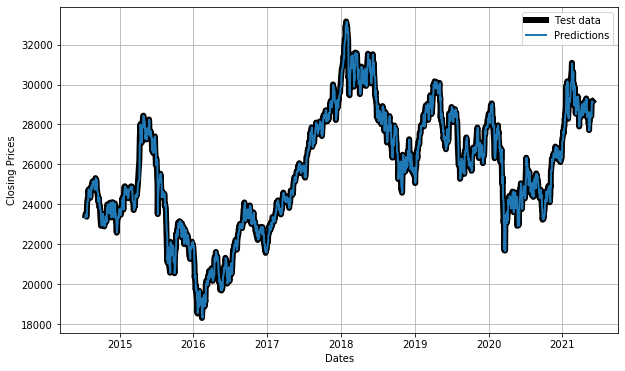

In [59]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

plt.plot(y_test, 'black',linewidth=6, label='Test data')
plt.plot(y_pred,linewidth=2,label='Predictions')
plt.legend()

The model with month variable doesn't show higher performance than the one without that variable.

## Question10:


In [60]:
np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(12, input_shape=(5,1), activation='linear'))

model.add(Dense(units=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
y = lag5_df['Close'].values
X = lag5_df.drop(['Close','month'],axis=1).values
y_train = y[:6792]
y_test = y[6792:]
X_train = X[:6792].reshape(6792, 5, 1)
X_test = X[6792:].reshape(1695, 5, 1)

In [62]:
X_train

array([[[ 2607.100098],
        [ 2583.899902],
        [ 2552.399902],
        [ 2540.100098],
        [ 2568.300049]],

       [[ 2603.300049],
        [ 2607.100098],
        [ 2583.899902],
        [ 2552.399902],
        [ 2540.100098]],

       [[ 2561.699951],
        [ 2603.300049],
        [ 2607.100098],
        [ 2583.899902],
        [ 2552.399902]],

       ...,

       [[23176.07031 ],
        [23541.38086 ],
        [23540.91992 ],
        [23546.35938 ],
        [23531.43945 ]],

       [[23238.99023 ],
        [23176.07031 ],
        [23541.38086 ],
        [23540.91992 ],
        [23546.35938 ]],

       [[23233.44922 ],
        [23238.99023 ],
        [23176.07031 ],
        [23541.38086 ],
        [23540.91992 ]]])

In [63]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Train on 6792 samples
Epoch 1/100
6792/6792 [==============================] - 7s 966us/sample - loss: 141304.5216
Epoch 2/100
6792/6792 [==============================] - 1s 173us/sample - loss: 111743.9526
Epoch 3/100
6792/6792 [==============================] - 1s 167us/sample - loss: 98951.9307
Epoch 4/100
6792/6792 [==============================] - 1s 153us/sample - loss: 87818.2841
Epoch 5/100
6792/6792 [==============================] - 1s 174us/sample - loss: 80305.0408
Epoch 6/100
6792/6792 [==============================] - 1s 152us/sample - loss: 75514.9855
Epoch 7/100
6792/6792 [==============================] - 1s 148us/sample - loss: 69047.5353
Epoch 8/100
6792/6792 [==============================] - 1s 146us/sample - loss: 68228.5016
Epoch 9/100
6792/6792 [==============================] - 1s 156us/sample - loss: 70477.5595
Epoch 10/100
6792/6792 [==============================] - 1s 149us/sample - loss: 62614.7581
Epoch 11/100
6792/6792 [==============================]

Epoch 89/100
6792/6792 [==============================] - 1s 158us/sample - loss: 55260.9923
Epoch 90/100
6792/6792 [==============================] - 1s 145us/sample - loss: 60986.7754
Epoch 91/100
6792/6792 [==============================] - 1s 140us/sample - loss: 57219.5442
Epoch 92/100
6792/6792 [==============================] - 1s 139us/sample - loss: 55506.3169
Epoch 93/100
6792/6792 [==============================] - 1s 139us/sample - loss: 57202.2338
Epoch 94/100
6792/6792 [==============================] - 1s 138us/sample - loss: 61383.1655
Epoch 95/100
6792/6792 [==============================] - 1s 139us/sample - loss: 57024.6178
Epoch 96/100
6792/6792 [==============================] - 1s 138us/sample - loss: 55010.9928
Epoch 97/100
6792/6792 [==============================] - 1s 138us/sample - loss: 60343.3087
Epoch 98/100
6792/6792 [==============================] - 1s 140us/sample - loss: 55079.8859
Epoch 99/100
6792/6792 [==============================] - 1s 139us/sam

In [64]:
y_pred = model.predict(X_test)

In [65]:
error = mean_squared_error(y_test,y_pred)
print("The RMSE is: ",np.sqrt(error))

The RMSE is:  426.16180592676824


In [66]:
var_close = y_test.var()
R_squared = 1-(error/var_close)

In [67]:
R_squared

0.9791186806887598

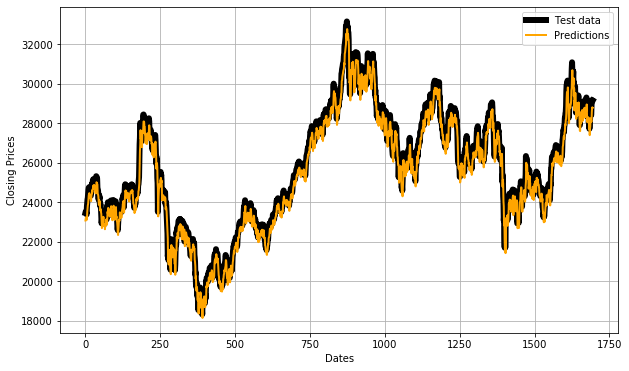

In [68]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

plt.plot(y_test, 'black',linewidth=6, label='Test data')
plt.plot(y_pred,linewidth=2,color='orange',label='Predictions')
plt.legend()

###### As we can see the RNN model perform  worse than AR model and also for the AR model we can have the coefiicients of each lag feature and know how it affects the prediction we want but here in the RNN model we cannot say what is happening or how each feature affects the prediction.
###### Also as we perform learning process of the RNN model each time we get different values for the weights and so the predictions differ but for the AR model we get the same values for the coefficients each time.

## Question11:

In [69]:
X = lag5_df.drop(['Close','month'],axis=1).values
y = lag5_df['Close'].values

In [70]:
y_train = y[:6792]
y_test = y[6792:]
X_train = X[:6792]
X_test = X[6792:]

In [71]:
model_non_linear = Sequential()
model_non_linear.add(Dense(32, input_dim=X.shape[1], activation='relu'))

model_non_linear.add(Dense(units=1))
model_non_linear.compile(loss='mean_squared_error', optimizer='adam')

In [72]:
history_nonlinear = model_non_linear.fit(X_train, y_train, epochs=100, batch_size=64)

Train on 6792 samples
Epoch 1/100
6792/6792 [==============================] - 1s 161us/sample - loss: 64227215.3765
Epoch 2/100
6792/6792 [==============================] - 0s 45us/sample - loss: 99282.4996
Epoch 3/100
6792/6792 [==============================] - 0s 44us/sample - loss: 96872.6191
Epoch 4/100
6792/6792 [==============================] - 0s 44us/sample - loss: 96679.5693
Epoch 5/100
6792/6792 [==============================] - 0s 43us/sample - loss: 96581.0460
Epoch 6/100
6792/6792 [==============================] - 0s 43us/sample - loss: 96251.2912
Epoch 7/100
6792/6792 [==============================] - 0s 44us/sample - loss: 96166.4852
Epoch 8/100
6792/6792 [==============================] - 0s 44us/sample - loss: 96001.6465
Epoch 9/100
6792/6792 [==============================] - 0s 44us/sample - loss: 96018.6878
Epoch 10/100
6792/6792 [==============================] - 0s 50us/sample - loss: 95638.9031
Epoch 11/100
6792/6792 [==============================] - 0s 45

In [73]:
y_pred = model_non_linear.predict(X_test)

In [74]:
error = mean_squared_error(y_test,y_pred)
print("The RMSE is: ",np.sqrt(error))

The RMSE is:  319.76732758059154


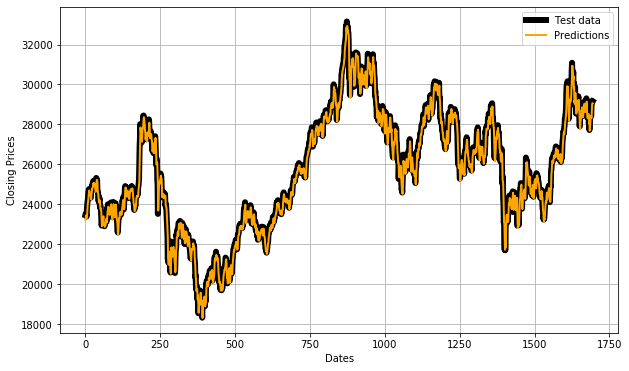

In [75]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

plt.plot(y_test, 'black',linewidth=6, label='Test data')
plt.plot(y_pred,linewidth=2,color='orange',label='Predictions')
plt.legend()

## Question12:

In [76]:
lag5_df['dow'] = lag5_df.index.dayofweek

In [77]:
X = lag5_df.drop(['Close','month'],axis=1).values
y = lag5_df['Close'].values

In [78]:
y_train = y[:6792]
y_test = y[6792:]
X_train = X[:6792]
X_test = X[6792:]

In [79]:
model_non_linear = Sequential()
model_non_linear.add(Dense(32, input_dim=X.shape[1], activation='relu'))

model_non_linear.add(Dense(units=1))
model_non_linear.compile(loss='mean_squared_error', optimizer='adam')
history_nonlinear = model_non_linear.fit(X_train, y_train, epochs=100, batch_size=64)

Train on 6792 samples
Epoch 1/100
6792/6792 [==============================] - 1s 205us/sample - loss: 38803625.3768
Epoch 2/100
6792/6792 [==============================] - 0s 50us/sample - loss: 66553.4515
Epoch 3/100
6792/6792 [==============================] - 0s 48us/sample - loss: 65375.1350
Epoch 4/100
6792/6792 [==============================] - 0s 47us/sample - loss: 65324.4764
Epoch 5/100
6792/6792 [==============================] - 0s 50us/sample - loss: 65329.3959
Epoch 6/100
6792/6792 [==============================] - 0s 50us/sample - loss: 65097.2601
Epoch 7/100
6792/6792 [==============================] - 0s 47us/sample - loss: 64969.1914
Epoch 8/100
6792/6792 [==============================] - 0s 45us/sample - loss: 65192.0875
Epoch 9/100
6792/6792 [==============================] - 0s 47us/sample - loss: 64679.9758
Epoch 10/100
6792/6792 [==============================] - 0s 56us/sample - loss: 64621.0711
Epoch 11/100
6792/6792 [==============================] - 0s 46

In [80]:
y_pred = model_non_linear.predict(X_test)
error = mean_squared_error(y_test,y_pred)
print("The RMSE is: ",np.sqrt(error))

The RMSE is:  299.3116937459341


In [82]:
var_close = y_test.var()
R_squared = 1-(error/var_close)
R_squared

0.9896995486496065

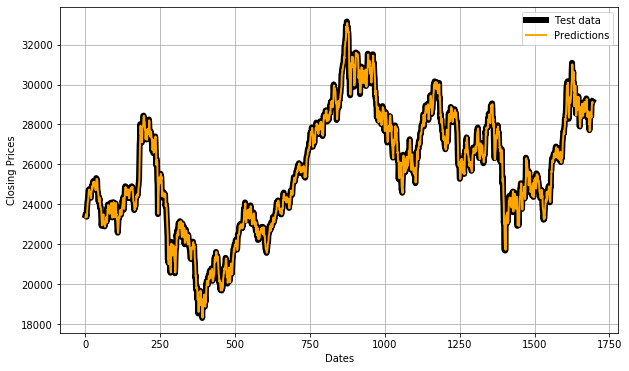

In [83]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

plt.plot(y_test, 'black',linewidth=6, label='Test data')
plt.plot(y_pred,linewidth=2,color='orange',label='Predictions')
plt.legend()

## Question13:

In [145]:
import keras
from keras import  regularizers, layers
NUM_WORDS=10000 
INDEX_FROM=3   

train,test = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
train_x,train_y = train
test_x,test_y = test

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in train_x[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [146]:
train_x.shape

(25000,)

In [147]:
from sklearn.preprocessing import Binarizer

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [149]:
x_train = vectorize_sequences(train_x)
x_test = vectorize_sequences(test_x)
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

y_train  (25000,)
y_test  (25000,)
x_train  (25000, 10000)
x_test  (25000, 10000)


In [150]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [151]:
model = Sequential()
model.add(Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))

model.add(Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))

model.add(Dense(1, activation='sigmoid'))
NumEpochs = 20
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 654us/sample - loss: 1.0707 - acc: 0.7496 - val_loss: 0.7040 - val_acc: 0.8373
Epoch 2/20
15000/15000 [==============================] - 7s 440us/sample - loss: 0.6656 - acc: 0.8392 - val_loss: 0.6563 - val_acc: 0.8386
Epoch 3/20
15000/15000 [==============================] - 6s 390us/sample - loss: 0.6119 - acc: 0.8549 - val_loss: 0.6014 - val_acc: 0.8591
Epoch 4/20
15000/15000 [==============================] - 5s 347us/sample - loss: 0.5847 - acc: 0.8589 - val_loss: 0.5806 - val_acc: 0.8611
Epoch 5/20
15000/15000 [==============================] - 5s 344us/sample - loss: 0.5672 - acc: 0.8618 - val_loss: 0.5871 - val_acc: 0.8542
Epoch 6/20
15000/15000 [==============================] - 5s 348us/sample - loss: 0.5570 - acc: 0.8659 - val_loss: 0.5806 - val_acc: 0.8484
Epoch 7/20
15000/15000 [==============================] - 6s 413us/sample - loss: 0.5443 - acc: 0.8680 - val_

In [152]:
results = model.evaluate(x_test, y_test)


25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [153]:
print("Test Loss and Accuracy")
print("results ", results)

Test Loss and Accuracy
results  [0.5196409494876861, 0.8686]


#### For dictionary_size=5000

In [154]:
NUM_WORDS=5000 
INDEX_FROM=3   

train,test = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
train_x,train_y = train
test_x,test_y = test

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3


In [ ]:
x_train = vectorize_sequences(train_x,5000)
x_test = vectorize_sequences(test_x,5000)
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model = Sequential()
model.add(Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(5000,)))

model.add(Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))

model.add(Dense(1, activation='sigmoid'))
NumEpochs = 20
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

